# Phân tích chỉ số chất lượng không khí (Air Quality Index) của USA

![](https://aihealth.vn/app/uploads/2021/07/AQI-la-gi-2.png)

**Dataset Source:**  https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates  

**Chú thích các đặc trưng trong tập dữ liệu:**   
- **City**: thành phố  
- **AQI**: chỉ số chất lượng không khí  
- **CO**: Carbon Monoxide (chất gây độc cho hệ hô hấp)  
- **PM2.5**: Chỉ số để chỉ các hạt hoặc giọt nhỏ trong không khí có chiều rộng từ 2.5 $\mu$ m trở xuống

![](https://aihealth.vn/app/uploads/2021/07/AQI-la-gi-3.png)

# 1. Khai báo thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

# 2. Xử lý dữ liệu

#### 2.1. Đọc dữ liệu

In [2]:
link='https://drive.google.com/file/d/1s5Zmdvu_FSHGQD2lbyDy-4IIX4yW3Zi8/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

# Lọc ra các ô của Hoa Kỳ
df = df.iloc[np.where(df['Country']=='United States of America')]    

#### 2.2. Xóa các dòng bị trống (Null, NaN)

In [3]:
df.dropna(inplace=True)

#### 2.3. Kiểm tra dữ liệu bị trùng lặp

In [4]:
df.duplicated().sum()

0

#### 2.4. Thông tin dữ liệu

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3775 entries, 2 to 6430
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             3775 non-null   object 
 1   City                3775 non-null   object 
 2   AQI Value           3775 non-null   int64  
 3   AQI Category        3775 non-null   object 
 4   CO AQI Value        3775 non-null   int64  
 5   CO AQI Category     3775 non-null   object 
 6   Ozone AQI Value     3775 non-null   int64  
 7   Ozone AQI Category  3775 non-null   object 
 8   NO2 AQI Value       3775 non-null   int64  
 9   NO2 AQI Category    3775 non-null   object 
 10  PM2.5 AQI Value     3775 non-null   int64  
 11  PM2.5 AQI Category  3775 non-null   object 
 12  lat                 3775 non-null   float64
 13  lng                 3775 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 442.4+ KB


- Bây giờ, chúng ta đã không còn dữ liệu bị thiếu
- Chúng ta có tổng cột 6346 hàng và 14 cột dữ liệu

#### 2.5. Mô tả dữ liệu 

In [6]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000
mean,59.706755,1.479735,27.868874,8.438675,58.062517,37.641690,-89.817368
std,23.074075,3.115605,12.955512,7.894770,24.218693,7.475176,16.436772
min,12.000000,0.000000,0.000000,0.000000,7.000000,-40.400000,-159.352100
25%,47.000000,1.000000,19.000000,3.000000,45.000000,34.137400,-96.738300
50%,55.000000,1.000000,28.000000,6.000000,54.000000,39.601500,-85.702600
75%,68.000000,2.000000,36.000000,12.000000,67.000000,41.732900,-77.082350
max,500.000000,133.000000,125.000000,53.000000,500.000000,64.869400,-37.877800


#### 2.6. Tạo các DataFrame theo nhóm cột

In [7]:
location_col = ['City']
coordination_col = ['lat', 'lng']
categorical_col = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
numerical_col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# 3. Phân tích khai phá dữ liệu (EDA)

## 3.1. Dữ liệu phân tích là số (numerical)

#### 3.1.1. Số thành phố khảo sát ở Hoa Kỳ

In [8]:
a = len(df['City'].unique())
print(f'Thực hiện khảo sát không khí trên {a} thành phố')

Thực hiện khảo sát không khí trên 2774 thành phố


#### 3.1.2 Vẽ biểu đồ Top 10 thành phố được khảo sát nhiều nhất

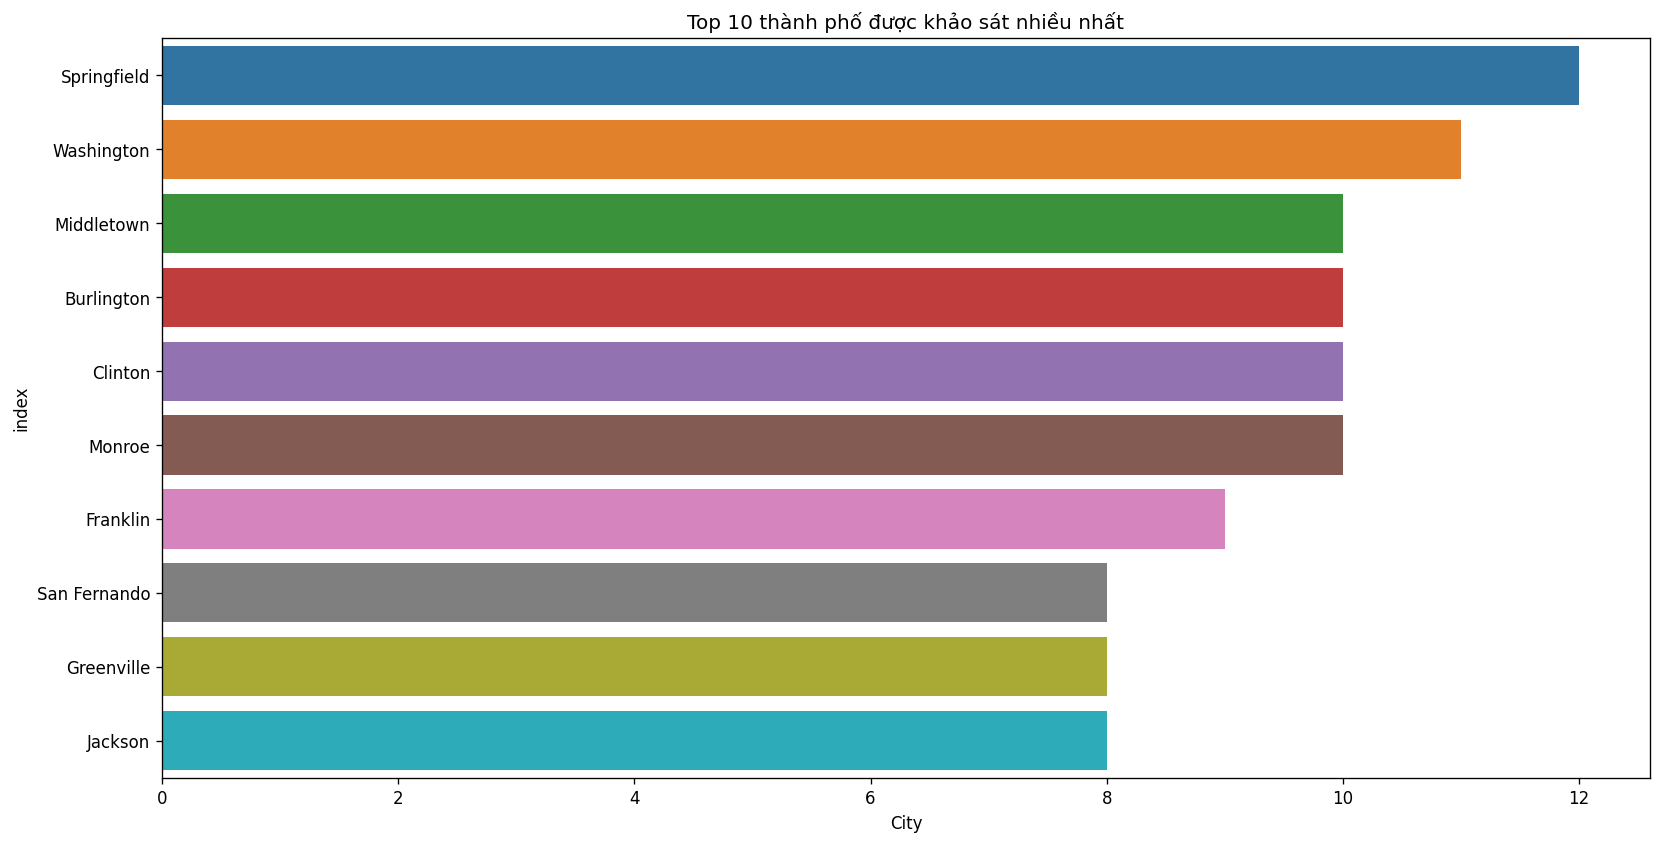

In [9]:
# Assuming df is your DataFrame
plt.figure(figsize=(16, 8))
top_cities = df['City'].value_counts().sort_values(ascending=False)[:10].reset_index()
sns.barplot(data=top_cities, y='index', x='City')  # 'City' represents the count column
plt.title('Top 10 thành phố được khảo sát nhiều nhất')
plt.show()


#### 3.1.3.Vẽ biểu đồ tọa độ của các điểm được khảo sát

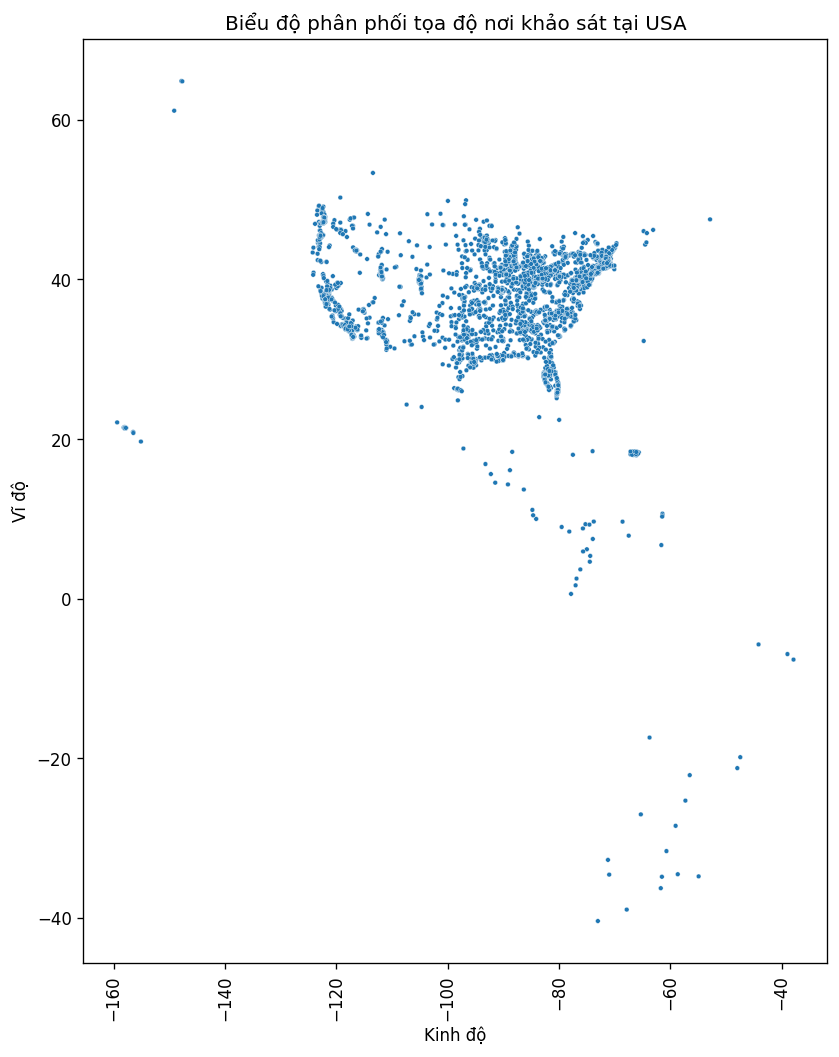

In [10]:
plt.figure(figsize=(8, 10))
sns.scatterplot(y=df['lat'], x=df['lng'], hue=df['Country'], legend=False, s=8)
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.title('Biểu độ phân phối tọa độ nơi khảo sát tại USA')
plt.xticks(rotation=90, ha='center');


#### 3.1.4.Nhận xét dữ liệu các tại các điểm đo đạc

In [11]:
df[numerical_col].describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000
mean,59.706755,1.479735,27.868874,8.438675,58.062517
std,23.074075,3.115605,12.955512,7.894770,24.218693
min,12.000000,0.000000,0.000000,0.000000,7.000000
25%,47.000000,1.000000,19.000000,3.000000,45.000000
50%,55.000000,1.000000,28.000000,6.000000,54.000000
75%,68.000000,2.000000,36.000000,12.000000,67.000000
max,500.000000,133.000000,125.000000,53.000000,500.000000


**Nhận xét:**  
1. AQI nói chung:
- Chỉ số AQI trung bình trong khảo sát là 59.706755 (nằm trong mức chất lượng không khí trung bình có thể chấp nhận được)
- Chỉ số AQI thấp nhất là 12.000000
- Chỉ số AQI cao nhất là 500.000000
2. Chỉ số CO AQI:
- Chỉ số CO AQI trung bình trong khảo sát là 1.479735
- Chỉ số CO AQI thấp nhất là 0
- Chỉ số CO AQI cao nhất là 133.000000
3. Chỉ số Ozone AQI:
- Chỉ số Ozone AQI trung bình trong khảo sát là 22.939962
- Chỉ số Ozone AQI thấp nhất là 0
- Chỉ số Ozone AQI cao nhất là 125.000000
4. Chỉ số NO2 AQI:
- Chỉ số NO2 AQI trung bình trong khảo sát là 6.356130
- Chỉ số NO2 AQI thấp nhất là 0
- Chỉ số NO2 AQI cao nhất là 53.000000
5. Chỉ số PM2.5 AQI:
- Chỉ số PM2.5 AQI trung bình trong khảo sát là 57.777498
- Chỉ số PM2.5 AQI thấp nhất là 7.000000
- Chỉ số PM2.5 AQI cao nhất là 500.000000


#### 3.1.5.Vẽ biểu đồ Histogram thể hiện phân phối của các tiêu chí đo khác nhau 

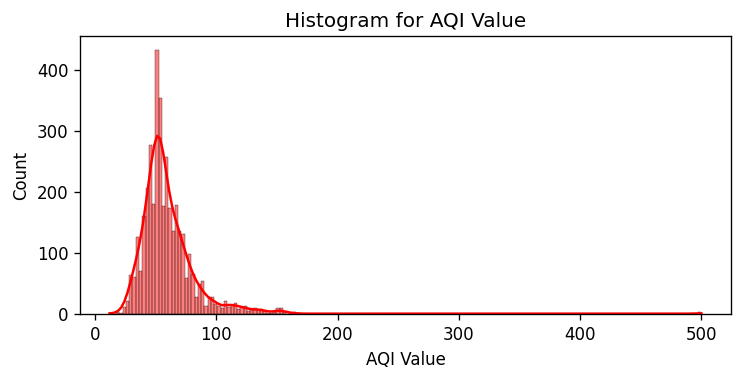

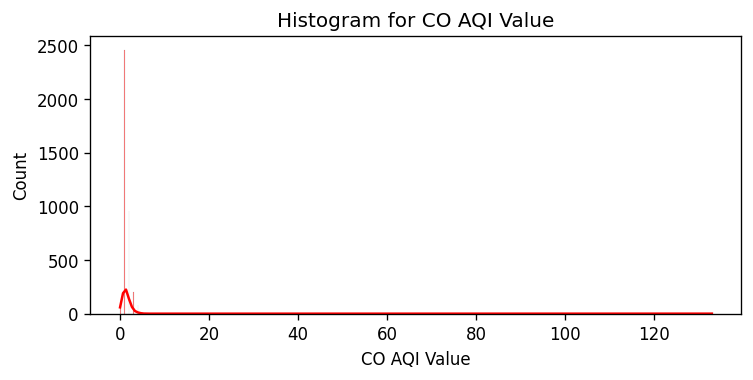

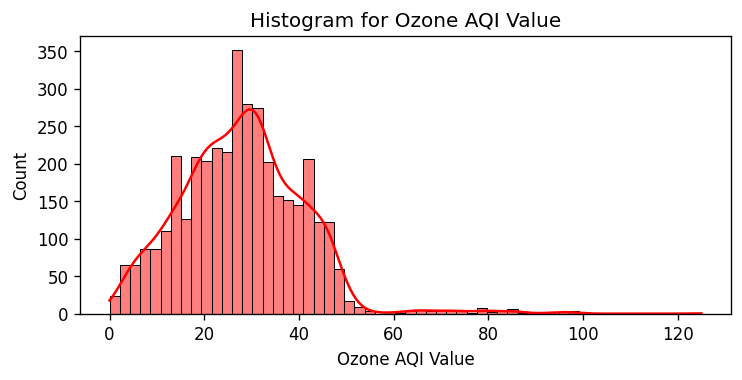

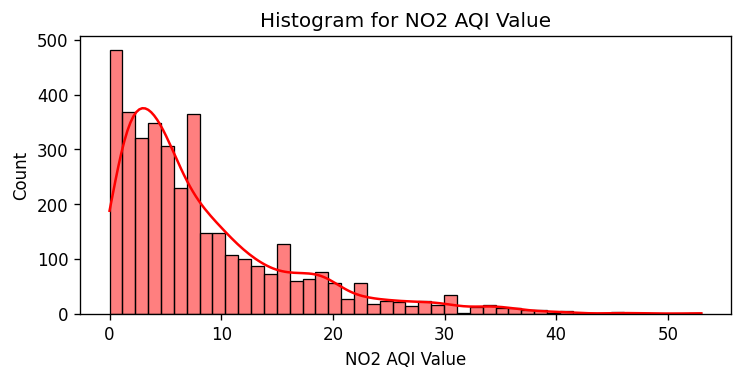

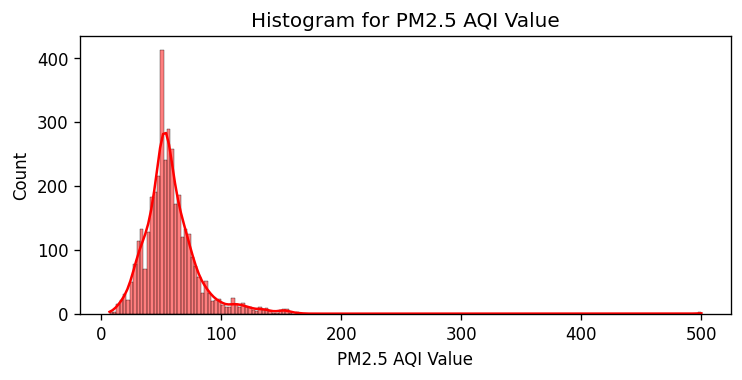

In [12]:
for x in numerical_col:
    sns.histplot(df[x], kde=True, color='red')  # Thay đổi màu thành đỏ
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.title(f'Histogram for {x}')
    plt.show()

#### 3.1.6. Đánh giá tính phân phối chuẩn của Bảng dữ liệu bằng kiểm định Kolmogorov-Smirnov Statistic

In [13]:
from scipy.stats import shapiro

for x in numerical_col:
    # Kiểm định Kolmogorov-Smirnov
    stat, p_value = shapiro(df[x])
    print(x)
    print(f"Stat: {stat}, P-value: {p_value}")

    if p_value > 0.05:
        print("Dữ liệu tuân theo phân phối chuẩn.")
    else:
        print("Dữ liệu không tuân theo phân phối chuẩn.")
    print('')


AQI Value
Stat: 0.7641445398330688, P-value: 0.0
Dữ liệu không tuân theo phân phối chuẩn.

CO AQI Value
Stat: 0.07588690519332886, P-value: 0.0
Dữ liệu không tuân theo phân phối chuẩn.

Ozone AQI Value
Stat: 0.9586934447288513, P-value: 1.7390070644991387e-31
Dữ liệu không tuân theo phân phối chuẩn.

NO2 AQI Value
Stat: 0.8366014361381531, P-value: 0.0
Dữ liệu không tuân theo phân phối chuẩn.

PM2.5 AQI Value
Stat: 0.8057838678359985, P-value: 0.0
Dữ liệu không tuân theo phân phối chuẩn.



**Nhận xét:**  
Ta thấy đa số những dữ liệu số có phân phối lệch trái, vậy thì nơi có mức độ ô nhiễm không khí thấp sẽ chiếm phần lớn. Đây là một tín hiệu tích cực về vấn đề ô nhiễm không khí toàn cầu

#### 3.1.7. Vẽ biểu đồ bar thể hiện Top 14 thành phố có giá trị AQI cao nhất

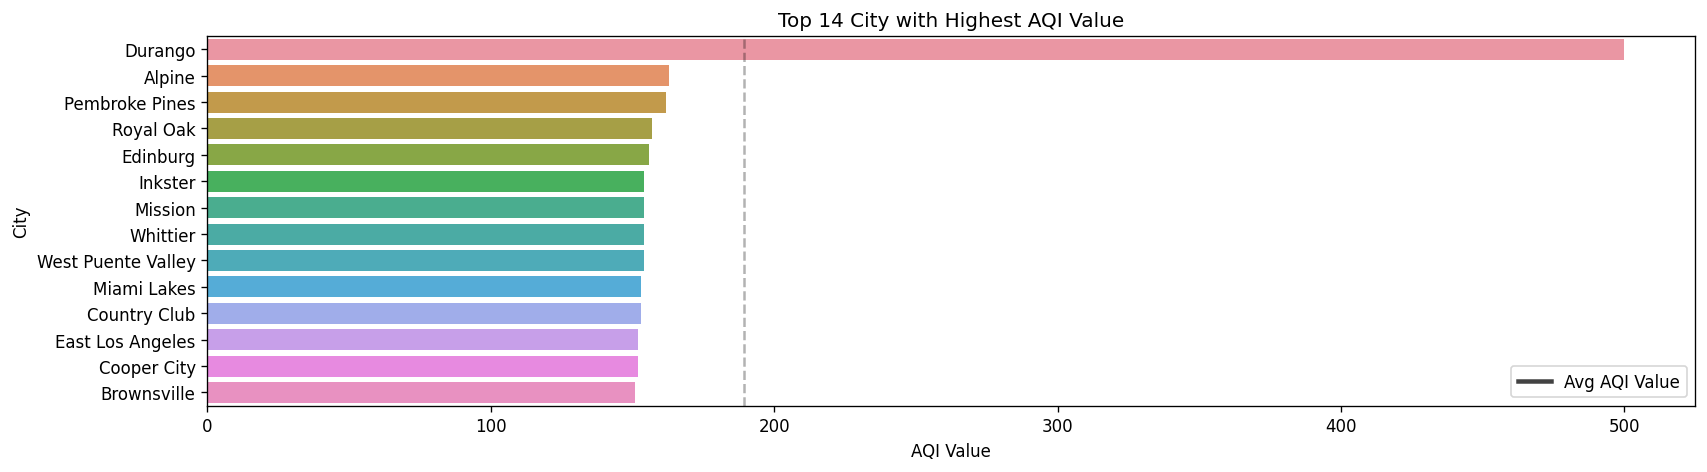

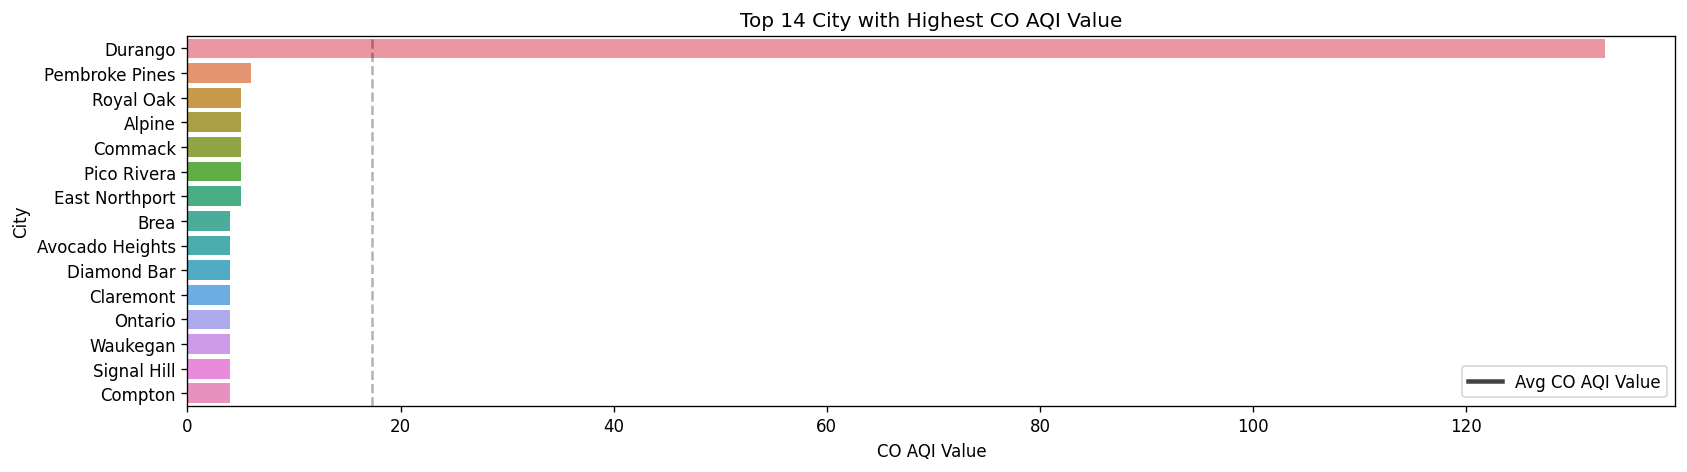

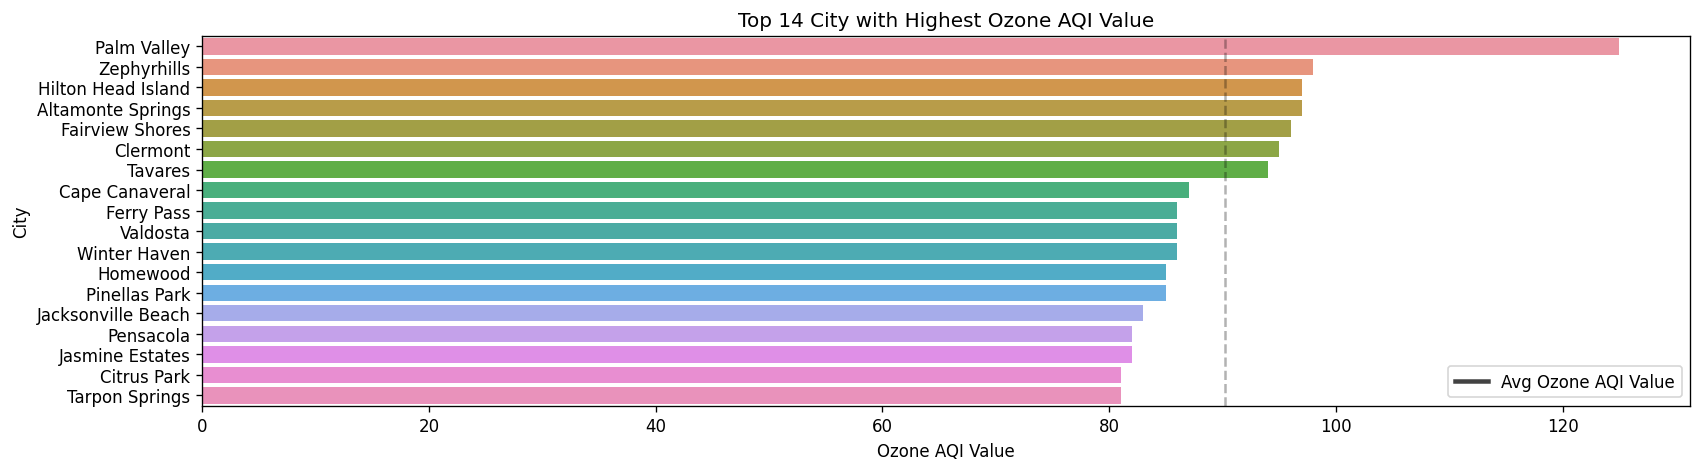

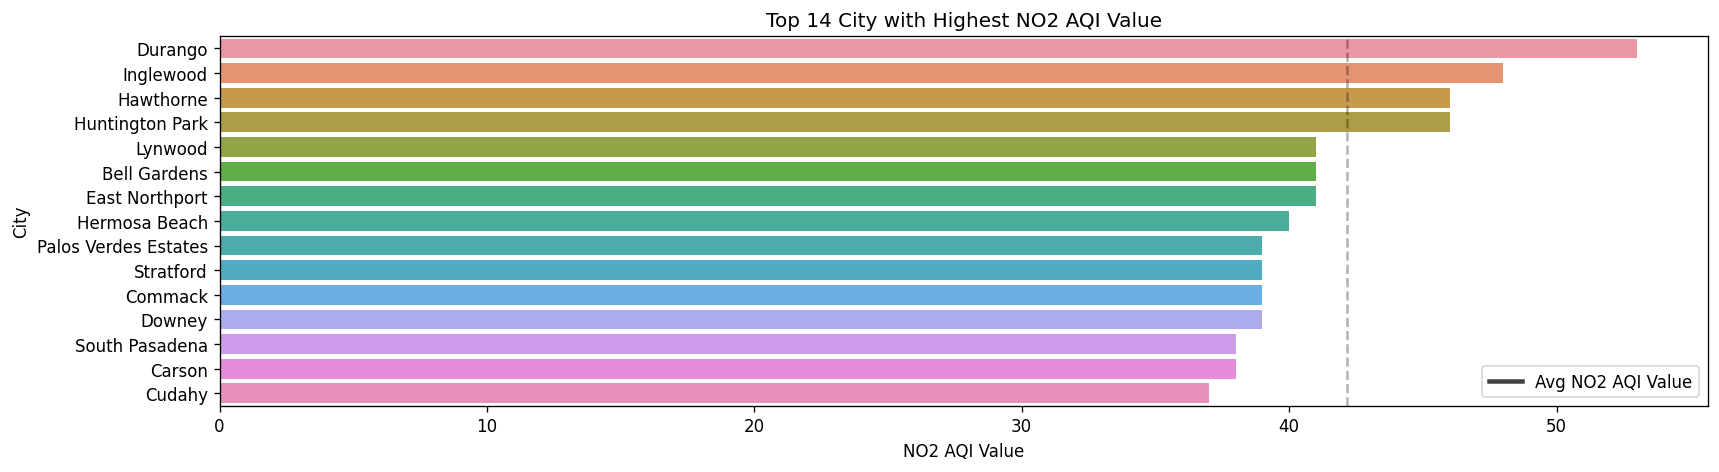

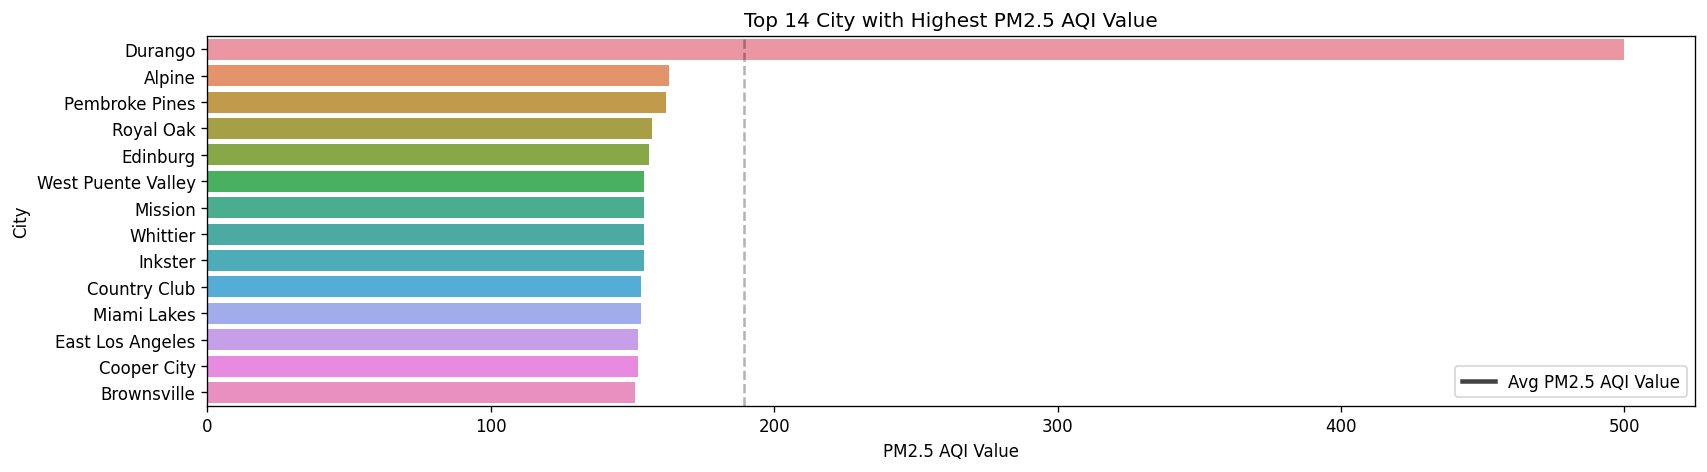

In [14]:
#Top 14 thành phố có giá trị AQI cao nhất
for x in df[numerical_col]:
    df_1 = df.loc[:, ['City', x]].sort_values(x, ascending=False)[:20]
    plt.figure(figsize=(16, 4))
    sns.barplot(data=df_1, x=x, y='City')
    plt.axvline(df_1[x].mean(), ls='--', color='black', alpha=0.3)
    plt.legend([f'Avg {x}'])
    plt.title(f'Top 14 City with Highest {x}');

**Nhận xét:**
- Ta thấy trong top 20, thành phố Durago,  có chất lượng không khí ô nhiễm cao nhất trong nước Mỹ, xuất hiện hầu hết 4/5 biểu đồ chỉ số ô nhiễm

## 3.2. Dữ liệu phân tích là chữ (Category)

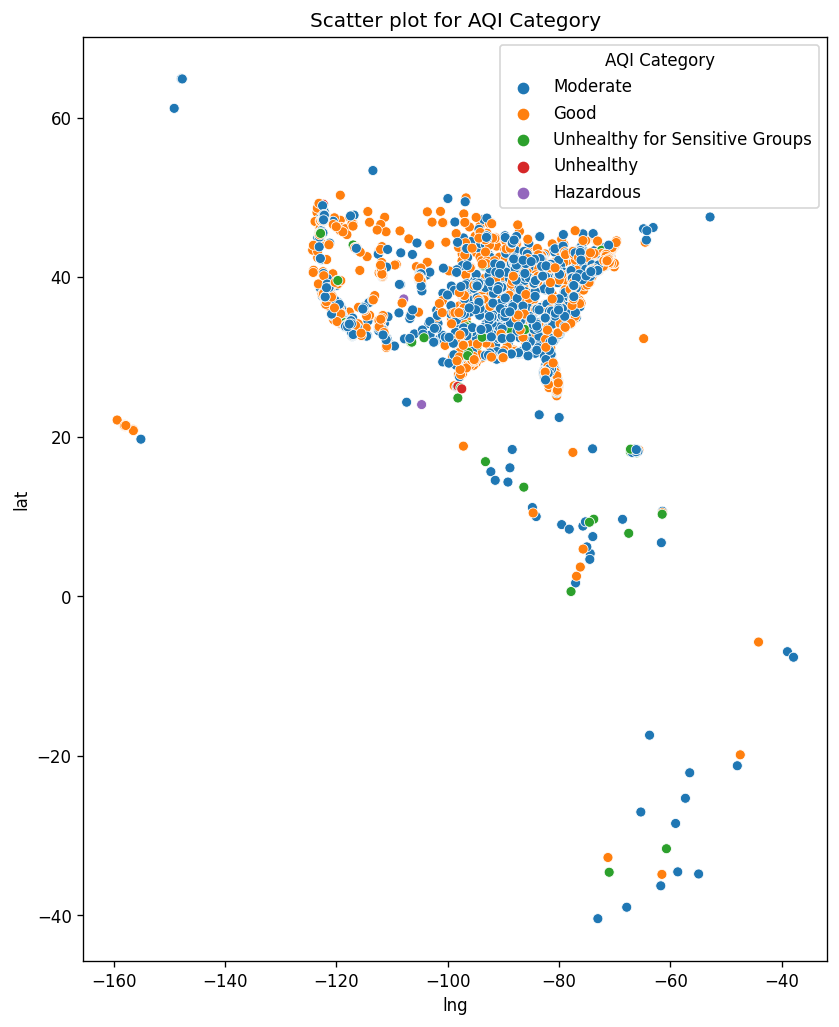

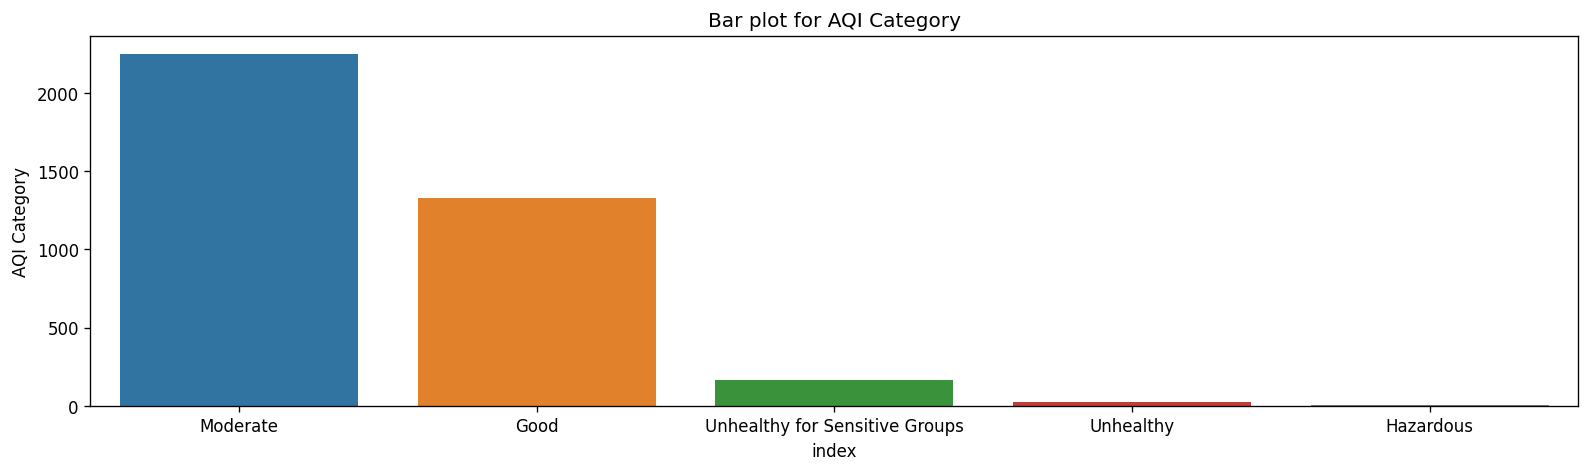

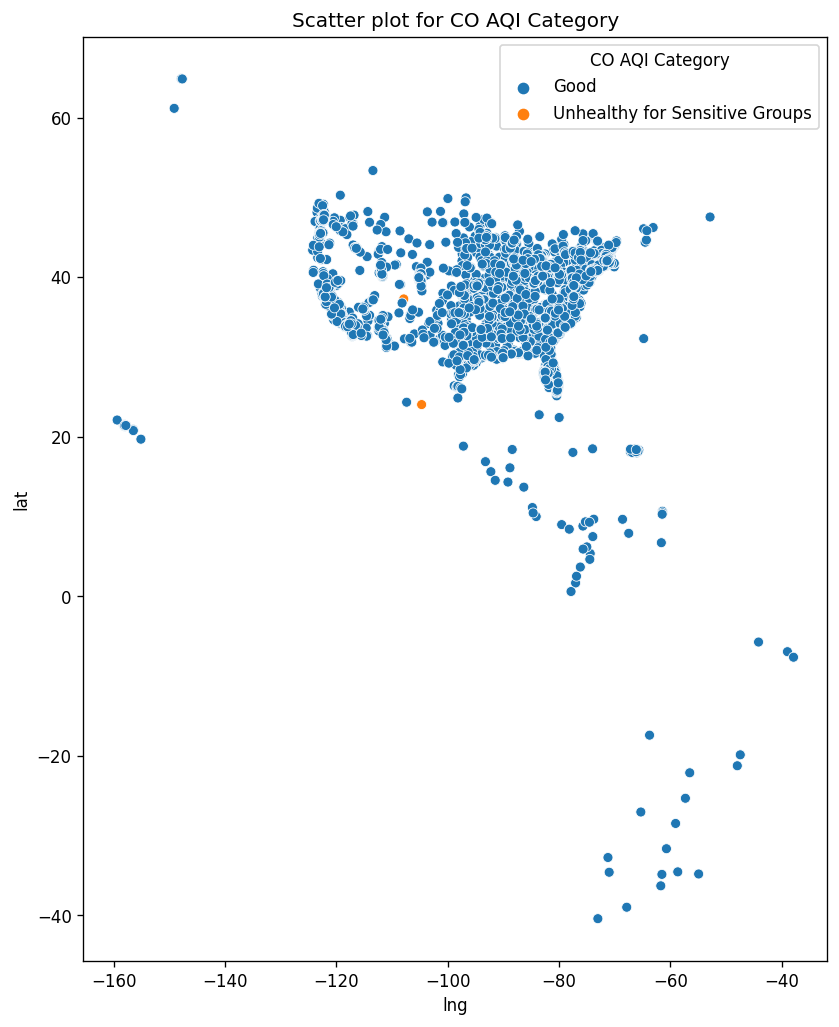

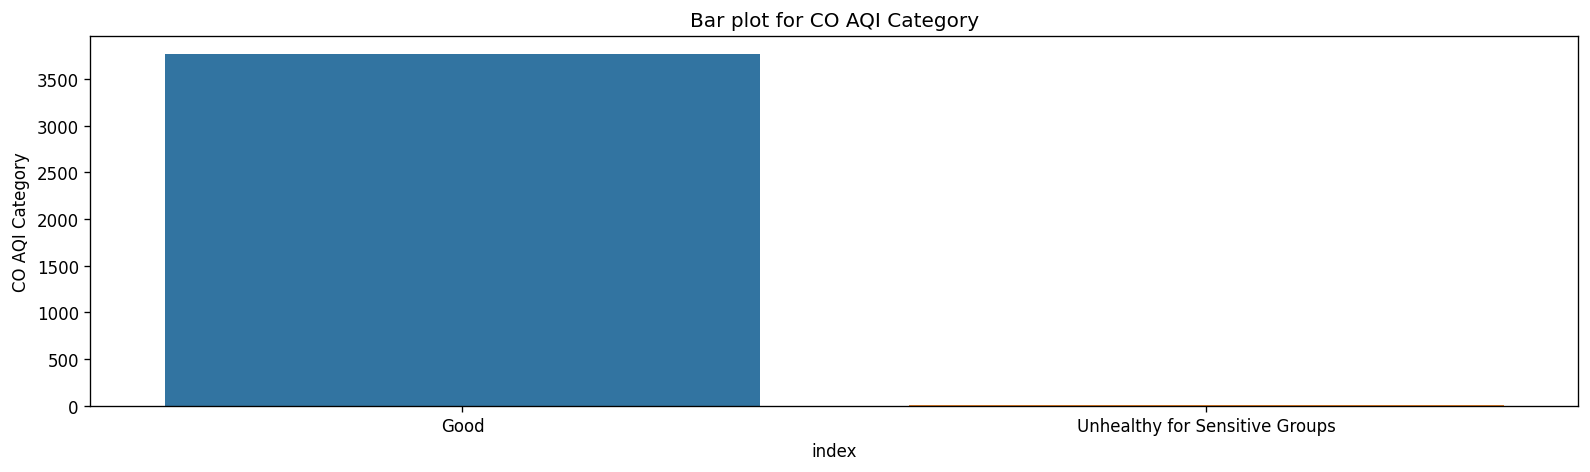

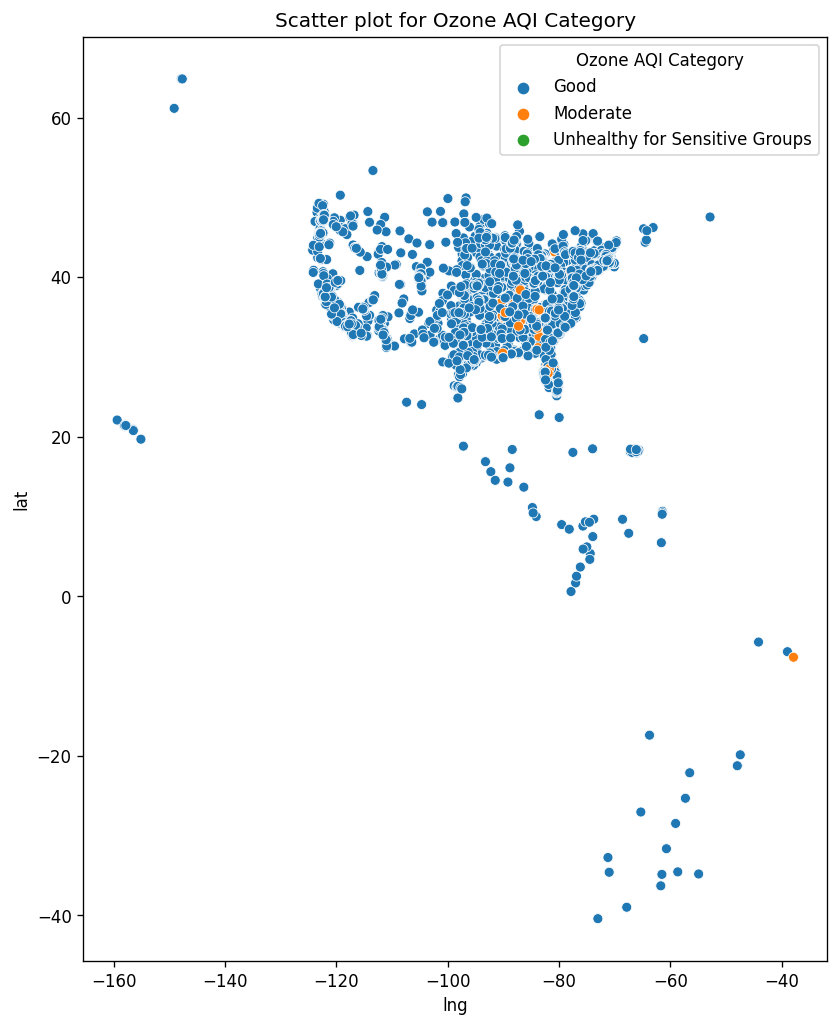

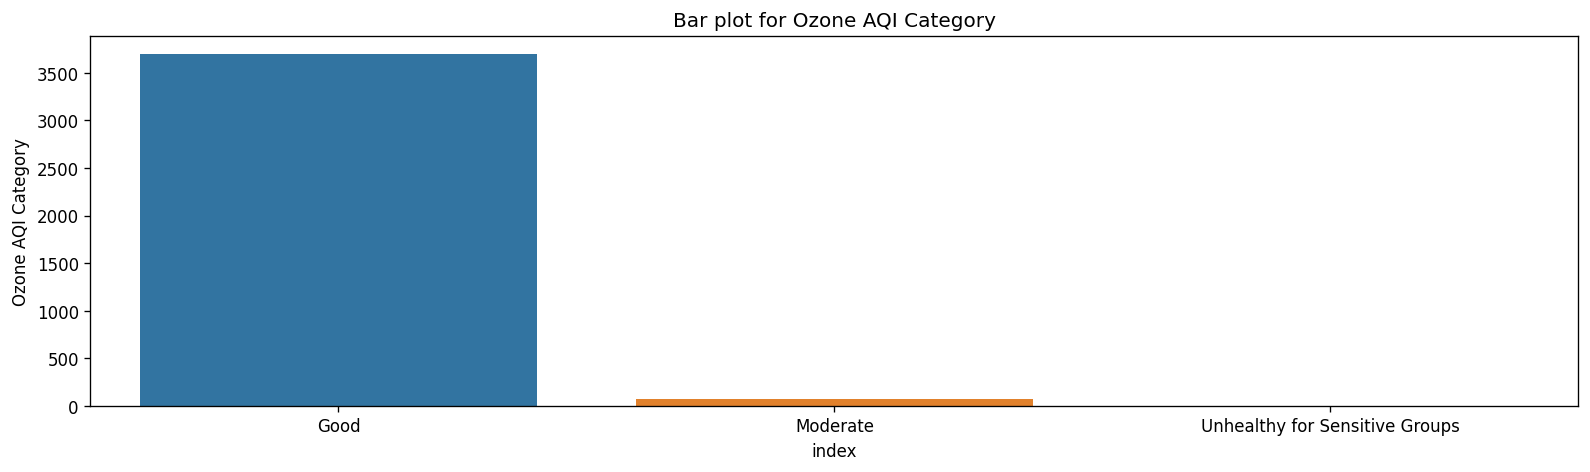

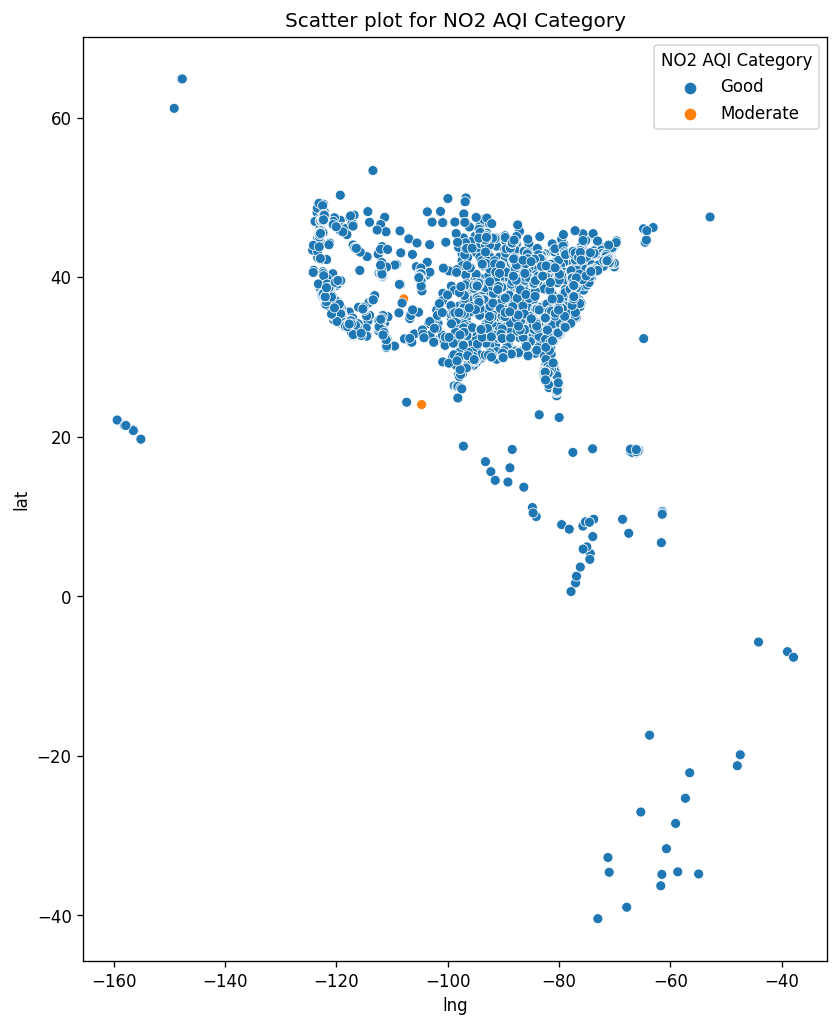

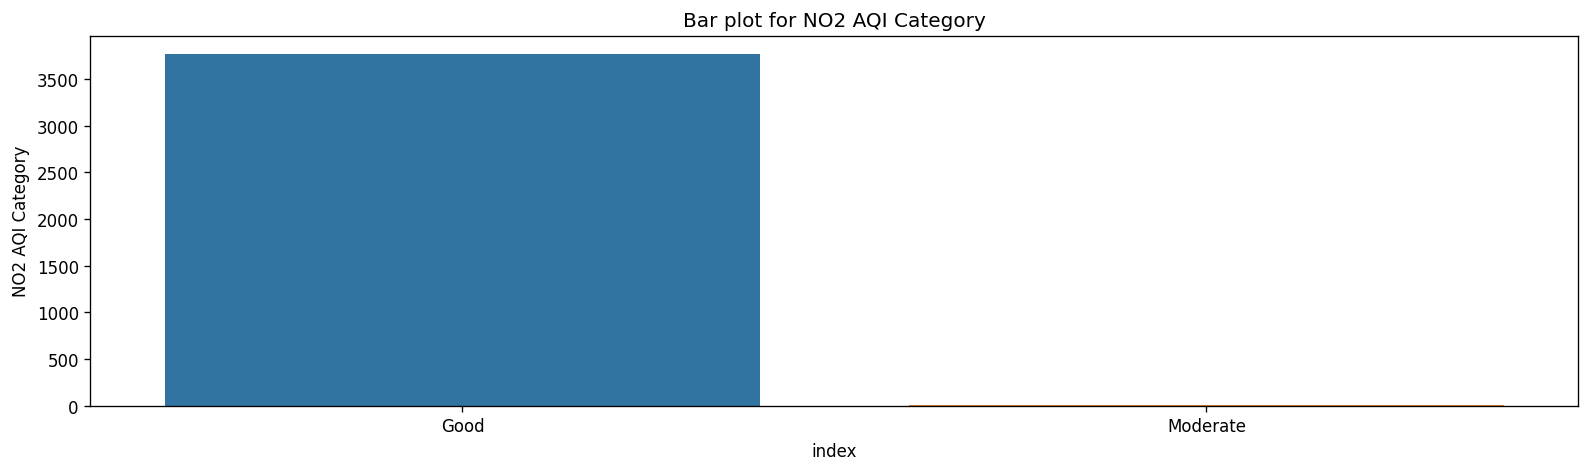

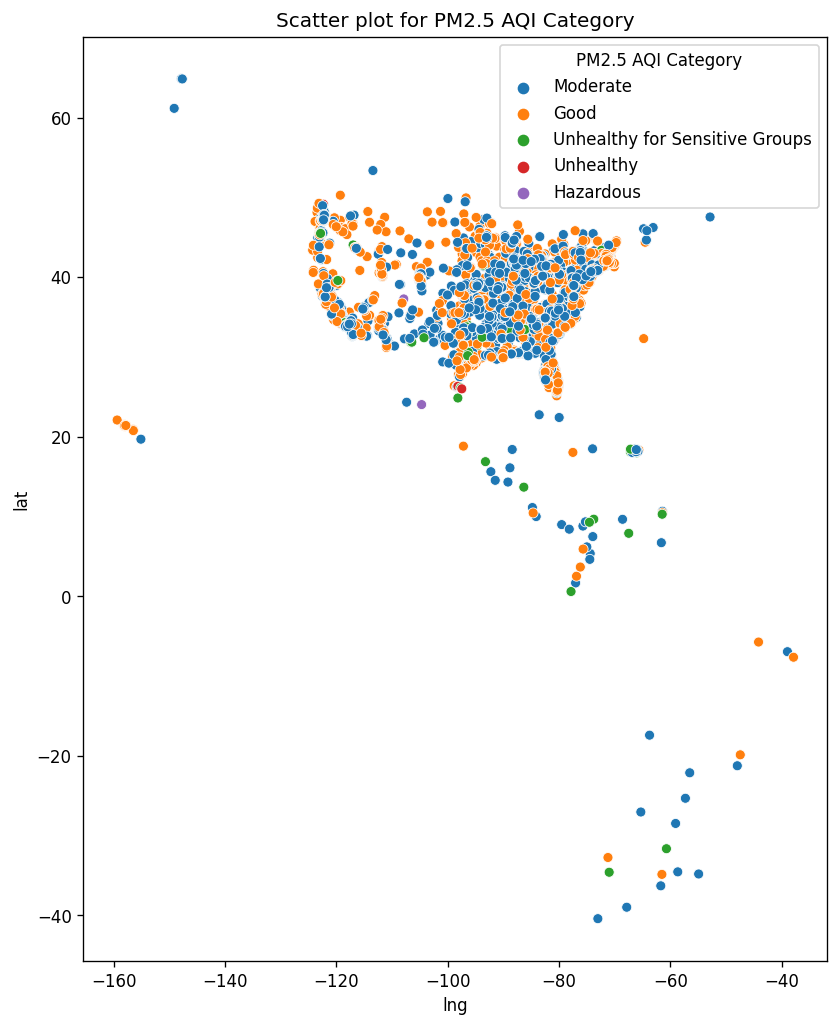

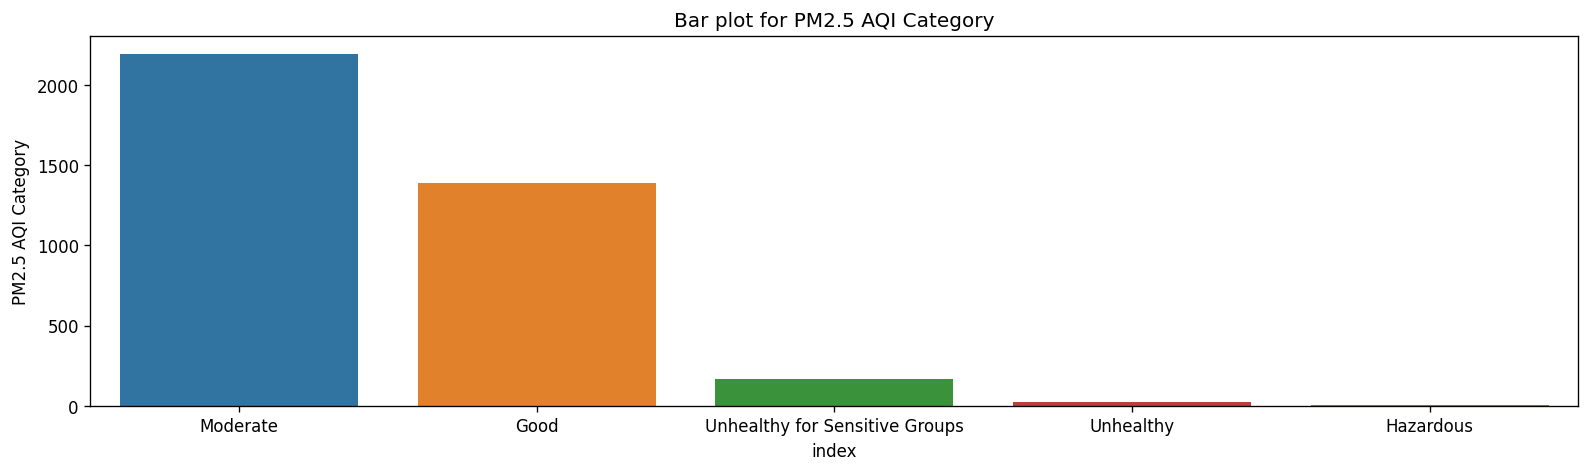

In [15]:
# Vẽ biểu đồ phân bố và biểu đồ bar cho từng AQI 
for x in categorical_col:
    # Scatter plot
    plt.figure(figsize=(8, 10))
    sns.scatterplot(x=df['lng'], y=df['lat'], hue=df[x])
    plt.title(f'Scatter plot for {x}')

    # Bar plot
    plt.figure(figsize=(16, 4))
    df_2 = df[x].value_counts().reset_index()
    sns.barplot(data=df_2, y=x, x='index')  # Replace 'count' with the actual count column name
    plt.title(f'Bar plot for {x}')

plt.show()

**Nhận xét:**
- Ta thấy đối với AQI chung và PM2.5 AQI có khá nhiều khu vực ô nhiễm, đồng thời mức độ ô nhiễm của 2 đặc trưng này tương tư nhau đối với từng khu vực.  
$\to$ Vậy có thể dự đoán sự tương quan của 2 đặc trưng này
- Còn đối với 3 đặc trưng ô nhiễm còn lại, các khu vực khá tốt khi mức độ ở mức *Good* và *Moderate*

# 4. Hồi quy tuyến tính

#### 4.1. Lập bảng và vẽ biểu đồ tương quan giữa các cột dữ liệu

In [16]:
# Tính ma trận tương quan
num_df = df[numerical_col]
corr_mat = num_df.corr()
corr_mat

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.572139,-0.343112,0.585069,0.957030
CO AQI Value,0.572139,1.000000,-0.164510,0.309403,0.554481
Ozone AQI Value,-0.343112,-0.164510,1.000000,-0.676867,-0.486121
NO2 AQI Value,0.585069,0.309403,-0.676867,1.000000,0.615143
PM2.5 AQI Value,0.957030,0.554481,-0.486121,0.615143,1.000000


<Axes: >

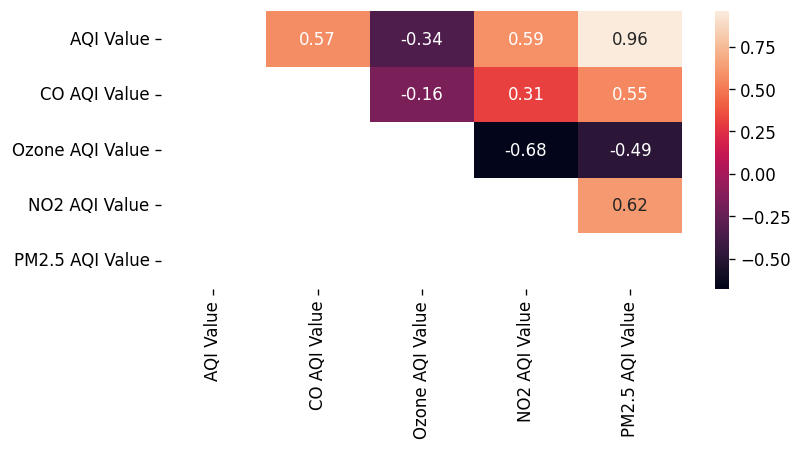

In [17]:
# Vẽ biểu đồ Heatmap của corr_mat
sns.heatmap(data=corr_mat, annot=True, mask=np.tril(corr_mat))

#### 4.2. Xây dụng hàm hồi quy giữa AQI Value - PM2.5 AQI Value

<Axes: xlabel='PM2.5 AQI Value', ylabel='AQI Value'>

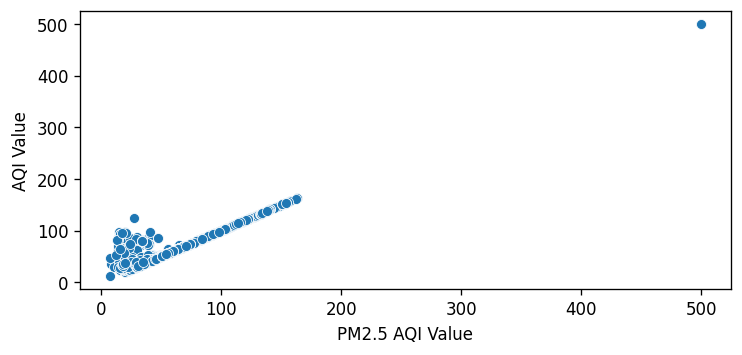

In [18]:
# Biểu đồ bọt biểu diễn phân phối của biến AQI chung và PM2.5 AQI
sns.scatterplot(data=num_df, x='PM2.5 AQI Value', y='AQI Value')

In [19]:
#Xây dựng mô hình hồi quy
from sklearn.linear_model import LinearRegression
x = np.array(num_df['PM2.5 AQI Value']).reshape(-1, 1)
y = np.array(num_df['AQI Value'])
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [20]:
# Tìm hệ số chặn và hệ số góc của mô hình
slope = model.coef_[0]
intercept = model.intercept_
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): 0.9117988045111479
Intercept: 6.765421783952192


Text(0.5, 1.0, 'Đường hồi quy tuyến tính')

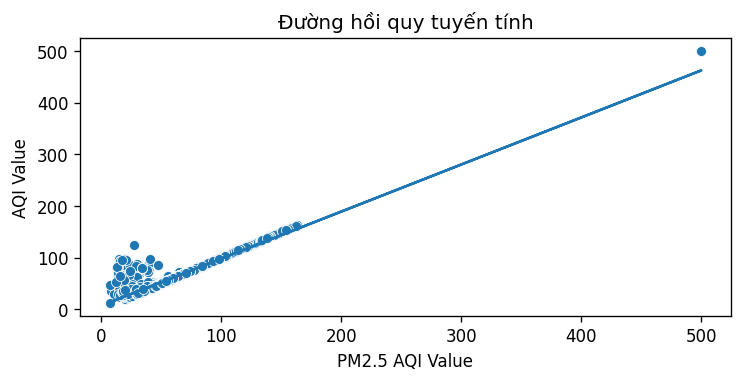

In [21]:
# Vẽ biểu đồ thể hiện hàm hồi quy
sns.scatterplot(data=num_df, x='PM2.5 AQI Value', y='AQI Value')
plt.plot(x, slope * x + intercept)
plt.title('Đường hồi quy tuyến tính')

In [22]:
# Xây dựng mô hình Hồi quy có train và test
X=df[['PM2.5 AQI Value']]
y=df[["AQI Value"]]
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [23]:
#Xây dựng mô hình
from sklearn.linear_model import LinearRegression #import thư viện
#1.Gọi mô hình từ thư viện Gán mô hình bằng 1 biến (model_lin)
model_lin= LinearRegression()
#2.Training model với training set
model_lin.fit(X_train,y_train)
#3.In ra thông tin của mô hình y=ax+b với a là độ dốc (model.coef_), b là intercept (model.intercept_)
print('a=',model_lin.coef_)
print('b=',model_lin.intercept_)

a= [[0.90502403]]
b= [7.17550042]


In [24]:
#Giả sử có 1 danh sách chiều cao thì mô hình sẽ dự báo ra 1 danh sách cân nặng tương ứng
#ví dụ danh sách đó là X_test chúng ta đã tách riêng ở trên
y_pred=model_lin.predict(X_test)
y_pred #Danh sách cân nặng dự báo tương ứng với X_test

array([[ 95.86785573],
       [ 54.23675017],
       [ 52.42670211],
       [ 56.04679824],
       [ 53.33172614],
       [ 53.33172614],
       [ 62.38196648],
       [ 52.42670211],
       [ 60.57191841],
       [ 52.42670211],
       [ 75.95732698],
       [121.20852867],
       [ 48.80660597],
       [ 68.71713471],
       [ 58.76187034],
       [ 49.71163001],
       [ 68.71713471],
       [ 76.86235102],
       [ 65.09703858],
       [ 66.00206261],
       [ 77.76737505],
       [ 43.37646177],
       [ 75.95732698],
       [ 37.04129353],
       [ 40.66138967],
       [118.49345657],
       [ 57.85684631],
       [ 56.04679824],
       [ 41.5664137 ],
       [ 40.66138967],
       [ 77.76737505],
       [ 48.80660597],
       [ 40.66138967],
       [ 46.9965579 ],
       [ 24.37095706],
       [ 77.76737505],
       [ 62.38196648],
       [ 26.18100513],
       [ 57.85684631],
       [ 73.24225488],
       [ 30.7061253 ],
       [ 35.23124547],
       [ 66.00206261],
       [ 58

In [25]:
# Do chúng ta có danh sách cân nặng thực tế (y_test) tương ứng với chiều cao (X_test) do vậy chúng ta có thể so sánh với cân nặng dự báo (y_pred)
# Một số công thức so sánh (đánh giá mô hình phổ biến): r-square/RMSE
from sklearn.metrics import r2_score
Ac2=r2_score(y_test, y_pred)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac2))

The accuracy of this model is:R-square= 0.93


In [26]:
# Calculate the root mean squared error(RMSE)
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('The accuracy of this model is:RMSE=',"{:.2f}".format(rmse))

The accuracy of this model is:RMSE= 6.51


#### 4.3. Xây dụng hàm hồi quy giữa AQI Value - CO AQI Value

<Axes: xlabel='AQI Value', ylabel='CO AQI Value'>

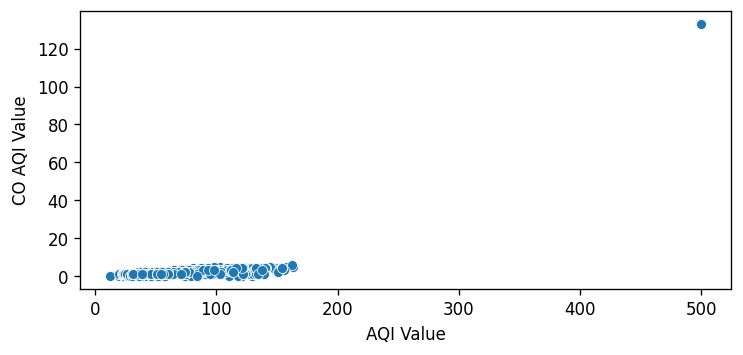

In [27]:
# Biểu đồ bọt biểu diễn phân phối của biến AQI chung và CO AQI
sns.scatterplot(data=num_df, x='AQI Value', y='CO AQI Value')

In [28]:
from sklearn.linear_model import LinearRegression
x = np.array(num_df['AQI Value']).reshape(-1, 1)
y = np.array(num_df['CO AQI Value'])
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [29]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): 0.07725378438963004
Intercept: -3.132837675478645


Text(0.5, 1.0, 'Đường hồi quy tuyến tính')

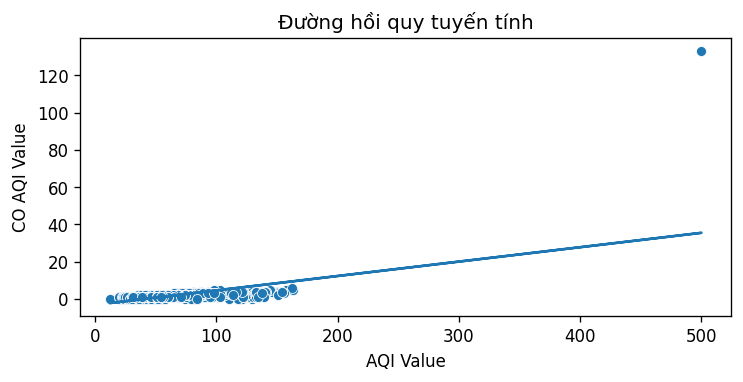

In [30]:
sns.scatterplot(data=num_df, x='AQI Value', y='CO AQI Value')
plt.plot(x, slope * x + intercept)
plt.title('Đường hồi quy tuyến tính')

#### 4.4. Xây dụng hàm hồi quy giữa AQI Value - Ozone AQI Value

<Axes: xlabel='AQI Value', ylabel='Ozone AQI Value'>

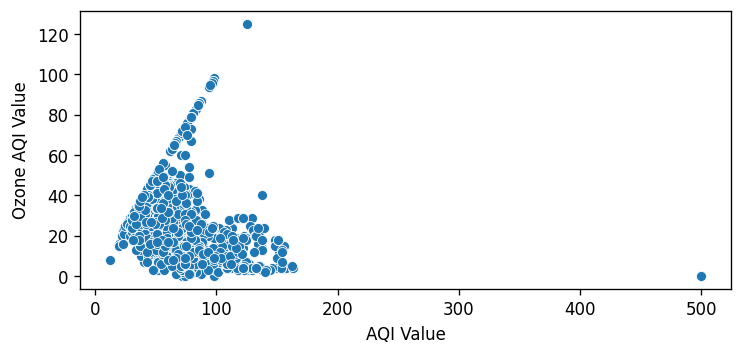

In [31]:
# Biểu đồ bọt biểu diễn phân phối của biến AQI chung và Ozone AQI
sns.scatterplot(data=num_df, x='AQI Value', y='Ozone AQI Value')

In [32]:
from sklearn.linear_model import LinearRegression
x = np.array(num_df['AQI Value']).reshape(-1, 1)
y = np.array(num_df['Ozone AQI Value'])
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [33]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): -0.1926487207743568
Intercept: 39.37130413814427


Text(0.5, 1.0, 'Đường hồi quy tuyến tính')

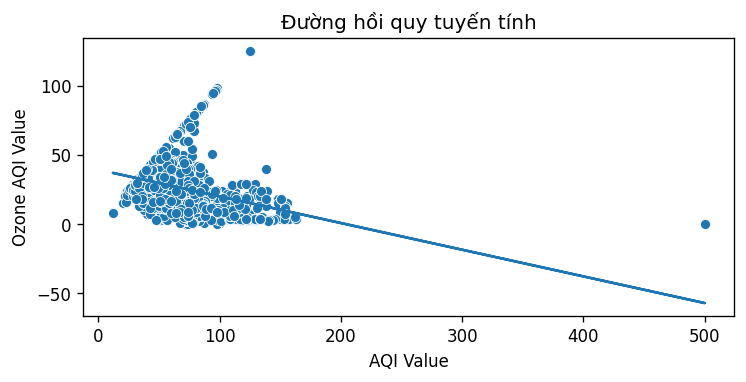

In [34]:
sns.scatterplot(data=num_df, x='AQI Value', y='Ozone AQI Value')
plt.plot(x, slope * x + intercept)
plt.title('Đường hồi quy tuyến tính')

#### 4.5. Xây dụng hàm hồi quy giữa AQI Value - NO2 AQI Value

<Axes: xlabel='AQI Value', ylabel='Ozone AQI Value'>

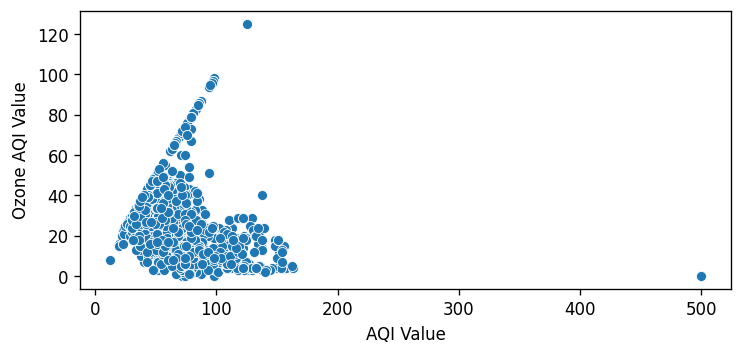

In [35]:
# Biểu đồ bọt biểu diễn phân phối của biến AQI chung và NO2 AQI
sns.scatterplot(data=num_df, x='AQI Value', y='Ozone AQI Value')

In [36]:
from sklearn.linear_model import LinearRegression
x = np.array(num_df['AQI Value']).reshape(-1, 1)
y = np.array(num_df['NO2 AQI Value'])
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [37]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): 0.20018082588731675
Intercept: -3.5134720236344332


Text(0.5, 1.0, 'Đường hồi quy tuyến tính')

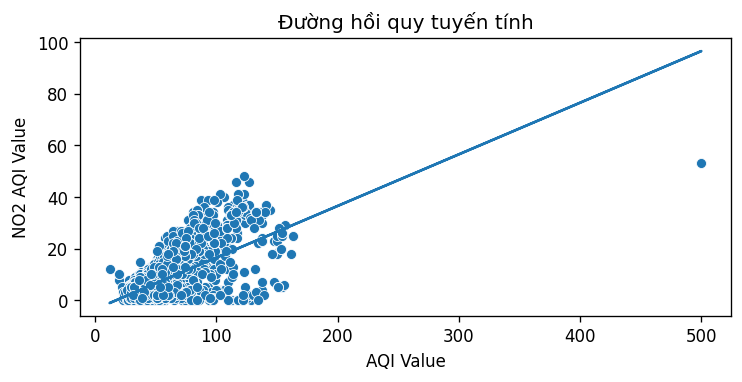

In [38]:
sns.scatterplot(data=num_df, x='AQI Value', y='NO2 AQI Value')
plt.plot(x, slope * x + intercept)
plt.title('Đường hồi quy tuyến tính')

#### 4.6. Xây dụng hàm hồi quy giữa AQI Value - CO, Ozone, NO2, PM2.5 AQI Value

In [39]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt



# Chia dữ liệu thành biến độc lập (X) và biến phụ thuộc (y)
X = df[["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]]
y = df["AQI Value"]

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# In ra các hệ số hồi quy
print('Coefficients:', model.coef_)

# In ra hệ số chặn (intercept)
print('Intercept:', model.intercept_)


Mean Absolute Error: 3.6032226768855096
Mean Squared Error: 31.444116376455707
Root Mean Squared Error: 5.607505361250732
Coefficients: [0.21655856 0.39873374 0.37997628 0.92604983]
Intercept: -8.708944423115248


In [40]:
# Giả sử bạn có một hàng dữ liệu mới với giá trị CO AQI, Ozone AQI, NO2 AQI, và PM2.5 AQI
new_data = [[1.49034, 27.993741, 8.454966, 57.814964]]  # Thay đổi giá trị tùy thuộc vào dữ liệu mới của bạn

# Dự đoán giá trị AQI bằng mô hình đã huấn luyện
predicted_aqi = model.predict(new_data)

# In ra kết quả dự đoán
print('Predicted AQI Value:', predicted_aqi[0])


Predicted AQI Value: 59.528074778642356


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 5. Semi Variogram - mô hình Variogram

#### 5.1. Chọn Ozone AQI Category để đánh giá phân bố không gian và tạo mô hình Variogram

In [41]:
df['lng'] = df['lng'].iloc[np.where(np.logical_and(df['lng'] >= -126, df['lng'] <= -68))]
df['lat'] = df['lat'].iloc[np.where(np.logical_and(df['lat'] >= 24, df['lat'] <= 51))]
df = df.dropna()

<Axes: xlabel='lng', ylabel='lat'>

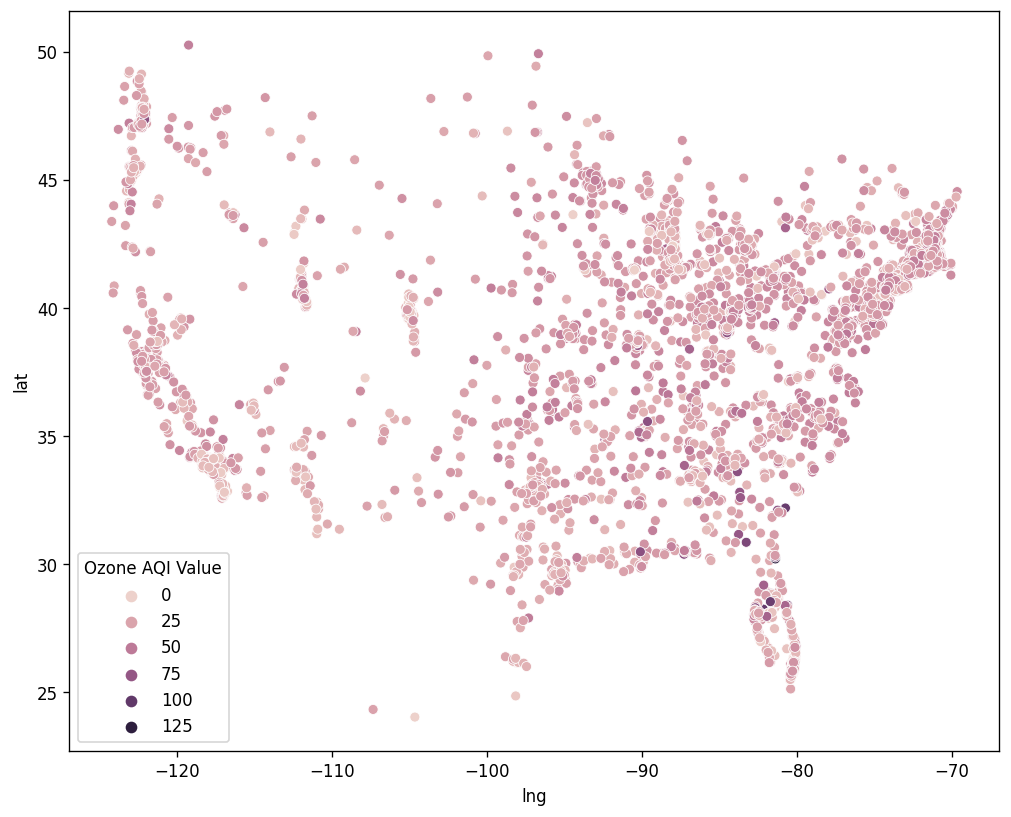

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['lng'], y=df['lat'], hue=df['Ozone AQI Value'])

#### 5.2. Tính semi-variogram với Ozone AQI value và vẽ mô hình Variogram

In [43]:
# Tính semi-variogram với Ozone AQI value

columns = ['lng', 'lat', 'Ozone AQI Value']
svg_df = df[columns][:500]

lng_arr = np.array(svg_df['lng'])
lat_arr = np.array(svg_df['lat'])
aqi_arr = np.array(svg_df['Ozone AQI Value'])
def semi_variogram(h):
    bin = []
    for i in range(len(lng_arr)):
        for j in range(i+1, len(lng_arr)):
            distance = np.sqrt((lng_arr[j] - lng_arr[i])**2 +  (lat_arr[j] - lat_arr[i])**2)
            if np.abs(distance - h) < 5:
                bin.append((aqi_arr[i] - aqi_arr[j])**2)
    if len(bin) == 0:
        return None
    else:
        return 0.5 * np.mean(bin)
lags = np.linspace(0, 70, 500)
var_values = [semi_variogram(h) for h in lags]
print(var_values)

[128.0077237757968, 127.37905185185186, 127.43805411629246, 127.78081616659203, 128.35840875833287, 128.66192124167586, 128.9715805007124, 129.04085660712522, 129.1505564616713, 129.10188204602628, 129.7835306390892, 130.3379102626567, 130.48588587286446, 131.22310368233497, 131.80791581918558, 131.80375634517767, 131.61791311247768, 131.56939543180673, 131.46102737385627, 131.77569225051107, 131.9763126296256, 132.1940330466436, 132.56804008128373, 132.76546827065596, 133.25867855447828, 133.5657334043545, 133.7079670599, 134.06962998558384, 134.72619831342675, 135.23540694819545, 135.7464145043447, 136.19423909521987, 136.74016374472023, 136.72940141344762, 137.03657413865253, 137.0985299360961, 137.3066372996784, 137.35216878135142, 137.37991715660075, 137.83982147615242, 138.07797678978326, 137.79024351676154, 137.75212397734424, 138.22973677352098, 138.68307871569135, 139.23316095502727, 139.64206679784326, 140.6540587832526, 141.58123993153444, 142.53735150681504, 143.28946911005

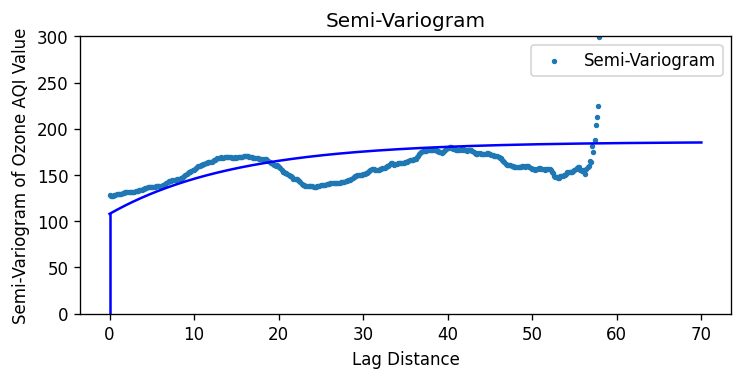

In [44]:
y = np.linspace(0, 108)
exp_model = 108 + 78 * (1 - np.exp(-lags / 15))
plt.scatter(lags, var_values, label='Semi-Variogram', s=5, marker='o')
plt.plot(lags, exp_model, c='blue')
plt.plot(np.array([0]*len(y)), y, c='blue')
plt.xlabel('Lag Distance')
plt.ylabel('Semi-Variogram of Ozone AQI Value')
plt.title('Semi-Variogram')
plt.ylim(0, 300)
plt.legend()
plt.show()

# 6. Xây dựng mô hình dự đoán Kriging Ordinary (OK)

#### 6.1. Cho AQI Value

In [45]:
import numpy as np
from pykrige.ok import OrdinaryKriging
import pandas as pd

# Đọc dữ liệu từ file hoặc từ DataFrame
# Giả sử bạn có một DataFrame có tên là df với các cột 'longitude', 'latitude', 'AQI_value'
# df = pd.read_csv('du_lieu.csv')  # Thay đổi tên file nếu cần

# Chuyển đổi DataFrame thành mảng NumPy
data = df[['lng', 'lat', 'AQI Value']].to_numpy()

# Tạo đối tượng OrdinaryKriging
ok = OrdinaryKriging(
    data[:, 0],  # Longitudes
    data[:, 1],  # Latitudes
    data[:, 2],  # AQI Values
    variogram_model='linear',  # Chọn mô hình tương quan, có thể là 'linear', 'power', 'spherical',...
    verbose=False
)

# Lưới điểm để dự đoán
grid_lon = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
grid_lat = np.linspace(min(data[:, 1]), max(data[:, 1]), 100)

# Dự đoán giá trị AQI cho từng điểm trên lưới
z, ss = ok.execute('grid', grid_lon, grid_lat)

# Kết quả là một ma trận z chứa giá trị dự đoán AQI tại các điểm trên lưới



In [46]:
# In giá trị dự đoán AQI tại các điểm trên lưới
print("Predicted AQI values:")
print(z)

# In bước nhảy tương ứng với mỗi giá trị dự đoán
print("\nLag values:")
print(ss)


Predicted AQI values:
[[92.77089613385216 93.30729132313773 93.85883005225836 ...
  64.49362229346507 64.27254904894238 64.05701927489345]
 [92.14336674909897 92.6706626385966 93.2122683562562 ...
  64.14522236142975 63.92865958236165 63.717499172301565]
 [91.51040731795952 92.02876953492229 92.56062137019785 ...
  63.79783111029665 63.58579080769088 63.37899691831677]
 ...
 [55.96633171730747 56.46509784811859 56.98917774673942 ...
  43.38525251904108 43.02485588198802 42.69199699065568]
 [55.9838566998228 56.41180226519712 56.80654392557567 ...
  43.296122683339014 42.94682798133109 42.623469726885276]
 [55.94865639393502 56.30023479703346 56.578555888689664 ...
  43.20580680261016 42.867302279332826 42.553200996727]]

Lag values:
[[485.48411190479635 481.2801281841742 477.2202419630708 ...
  460.783263657264 466.5084235932602 472.23028094071947]
 [482.6360762383153 478.41499624804686 474.3403283549491 ...
  458.92044886045255 464.6360374450684 470.3477444652493]
 [479.7949223502275 

In [47]:
# Ví dụ: In ra giá trị dự đoán cho một số điểm trên lưới
for i in range(10):
    for j in range(10):
        lon = grid_lon[i]
        lat = grid_lat[j]
        prediction = z[j, i]  # Chú ý rằng chỉ số của mảng là [row, column]
        print(f'Longitude: {lon}, Latitude: {lat}, Predicted AQI: {prediction}')


Longitude: -124.233, Latitude: 24.025, Predicted AQI: 92.77089613385216
Longitude: -124.233, Latitude: 24.290070707070704, Predicted AQI: 92.14336674909897
Longitude: -124.233, Latitude: 24.555141414141413, Predicted AQI: 91.51040731795952
Longitude: -124.233, Latitude: 24.82021212121212, Predicted AQI: 90.87220567989893
Longitude: -124.233, Latitude: 25.08528282828283, Predicted AQI: 90.22893518403518
Longitude: -124.233, Latitude: 25.350353535353534, Predicted AQI: 89.58075022306795
Longitude: -124.233, Latitude: 25.61542424242424, Predicted AQI: 88.92778128204492
Longitude: -124.233, Latitude: 25.88049494949495, Predicted AQI: 88.27012949060749
Longitude: -124.233, Latitude: 26.145565656565655, Predicted AQI: 87.60786067977013
Longitude: -124.233, Latitude: 26.410636363636364, Predicted AQI: 86.94099896170503
Longitude: -123.68178181818182, Latitude: 24.025, Predicted AQI: 93.30729132313773
Longitude: -123.68178181818182, Latitude: 24.290070707070704, Predicted AQI: 92.6706626385966

In [48]:
# Dự đoán giá trị AQI cho một vị trí cụ thể
lon_new = 75.0
lat_new = 30.0
prediction_single_point, ss_single_point = ok.execute('points', lon_new, lat_new)
print(f'Longitude: {lon_new}, Latitude: {lat_new}, Predicted AQI: {prediction_single_point}')


Longitude: 75.0, Latitude: 30.0, Predicted AQI: [55.67785371448784]


Xây dựng mô hình Kriging 3D

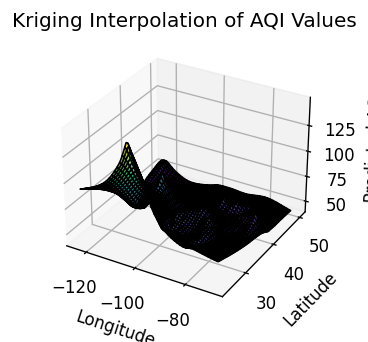

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Vẽ biểu đồ 3D cho giá trị dự đoán
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tạo lưới điểm cho biểu đồ
lon_grid, lat_grid = np.meshgrid(grid_lon, grid_lat)

# Vẽ bề mặt
surf = ax.plot_surface(lon_grid, lat_grid, z, cmap='viridis', edgecolor='k')

# Đặt tên trục và tiêu đề
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Predicted AQI')
ax.set_title('Kriging Interpolation of AQI Values')

# Hiển thị biểu đồ
plt.show()


Xây dựng mô hình Kriging 2D

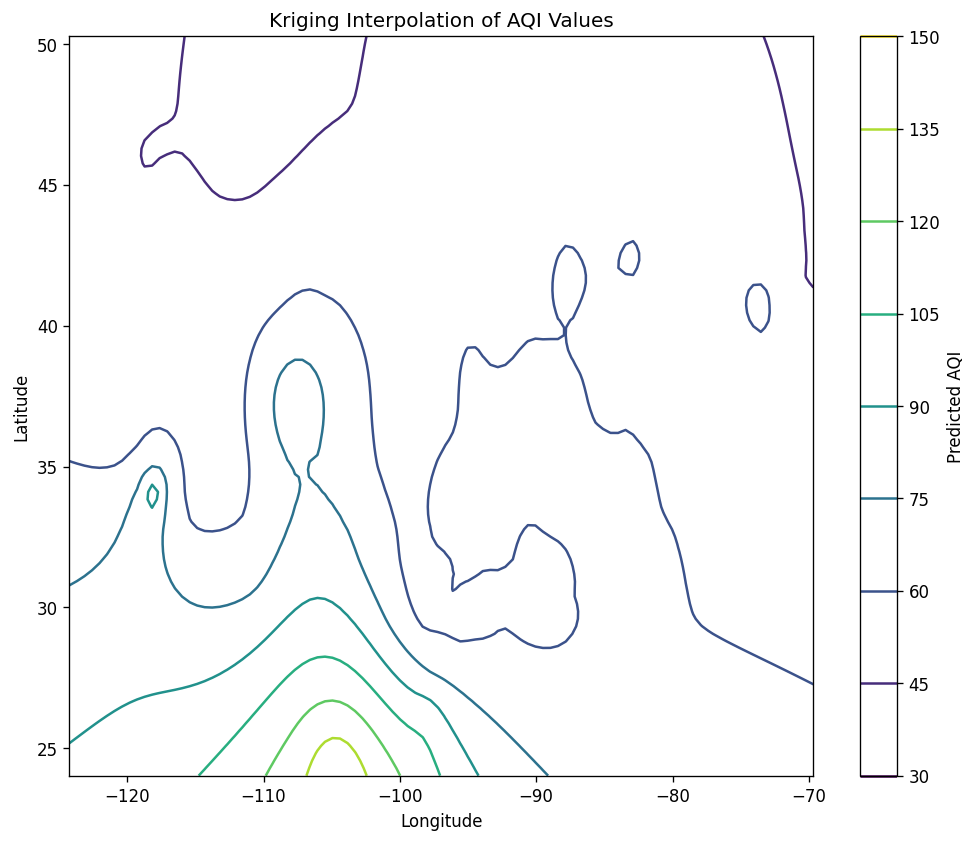

In [50]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ contour cho giá trị dự đoán
plt.figure(figsize=(10, 8))
contour = plt.contour(grid_lon, grid_lat, z, cmap='viridis')
plt.colorbar(contour, label='Predicted AQI')

# Đặt tên trục và tiêu đề
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kriging Interpolation of AQI Values')

# Hiển thị biểu đồ
plt.show()


#### 6.2. Cho PM2.5 Value

In [51]:
import numpy as np
from pykrige.ok import OrdinaryKriging
import pandas as pd

# Đọc dữ liệu từ file hoặc từ DataFrame
# Giả sử bạn có một DataFrame có tên là df với các cột 'longitude', 'latitude', 'AQI_value'
# df = pd.read_csv('du_lieu.csv')  # Thay đổi tên file nếu cần

# Chuyển đổi DataFrame thành mảng NumPy
data = df[['lng', 'lat', 'PM2.5 AQI Value']].to_numpy()

# Tạo đối tượng OrdinaryKriging
ok = OrdinaryKriging(
    data[:, 0],  # Longitudes
    data[:, 1],  # Latitudes
    data[:, 2],  # AQI Values
    variogram_model='linear',  # Chọn mô hình tương quan, có thể là 'linear', 'power', 'spherical',...
    verbose=False
)

# Lưới điểm để dự đoán
grid_lon = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
grid_lat = np.linspace(min(data[:, 1]), max(data[:, 1]), 100)

# Dự đoán giá trị AQI cho từng điểm trên lưới
z, ss = ok.execute('grid', grid_lon, grid_lat)

# Kết quả là một ma trận z chứa giá trị dự đoán AQI tại các điểm trên lưới


In [52]:
# Ví dụ: In ra giá trị dự đoán cho một số điểm trên lưới
for i in range(10):
    for j in range(10):
        lon = grid_lon[i]
        lat = grid_lat[j]
        prediction = z[j, i]  # Chú ý rằng chỉ số của mảng là [row, column]
        print(f'Longitude: {lon}, Latitude: {lat}, Predicted PM2.5 AQI: {prediction}')


Longitude: -124.233, Latitude: 24.025, Predicted PM2.5 AQI: 92.4465218383026
Longitude: -124.233, Latitude: 24.290070707070704, Predicted PM2.5 AQI: 91.8286277118345
Longitude: -124.233, Latitude: 24.555141414141413, Predicted PM2.5 AQI: 91.2050559438701
Longitude: -124.233, Latitude: 24.82021212121212, Predicted PM2.5 AQI: 90.57596673885293
Longitude: -124.233, Latitude: 25.08528282828283, Predicted PM2.5 AQI: 89.94150483388573
Longitude: -124.233, Latitude: 25.350353535353534, Predicted PM2.5 AQI: 89.30179507133508
Longitude: -124.233, Latitude: 25.61542424242424, Predicted PM2.5 AQI: 88.65693749960867
Longitude: -124.233, Latitude: 25.88049494949495, Predicted PM2.5 AQI: 88.00700199325729
Longitude: -124.233, Latitude: 26.145565656565655, Predicted PM2.5 AQI: 87.35202239623072
Longitude: -124.233, Latitude: 26.410636363636364, Predicted PM2.5 AQI: 86.69199020987682
Longitude: -123.68178181818182, Latitude: 24.025, Predicted PM2.5 AQI: 92.98356100917172
Longitude: -123.68178181818182

In [53]:
# Dự đoán giá trị AQI cho một vị trí cụ thể
lon_new = 75.0
lat_new = 30.0
prediction_single_point, ss_single_point = ok.execute('points', lon_new, lat_new)
print(f'Longitude: {lon_new}, Latitude: {lat_new}, Predicted PM2.5 AQI: {prediction_single_point}')


Longitude: 75.0, Latitude: 30.0, Predicted PM2.5 AQI: [51.806282842737]


Xây dựng mô hình Kriging 3D

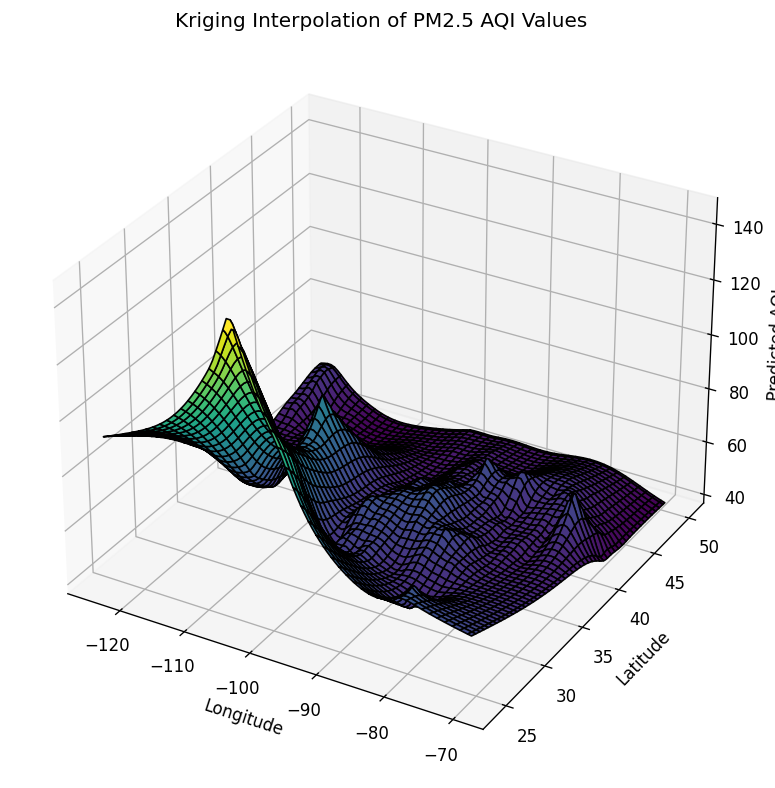

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Vẽ biểu đồ 3D cho giá trị dự đoán
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tạo lưới điểm cho biểu đồ
lon_grid, lat_grid = np.meshgrid(grid_lon, grid_lat)

# Vẽ bề mặt
surf = ax.plot_surface(lon_grid, lat_grid, z, cmap='viridis', edgecolor='k')

# Đặt tên trục và tiêu đề
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Predicted AQI')
ax.set_title('Kriging Interpolation of PM2.5 AQI Values')

# Hiển thị biểu đồ
plt.show()


Xây dựng mô hình Kriging 2D

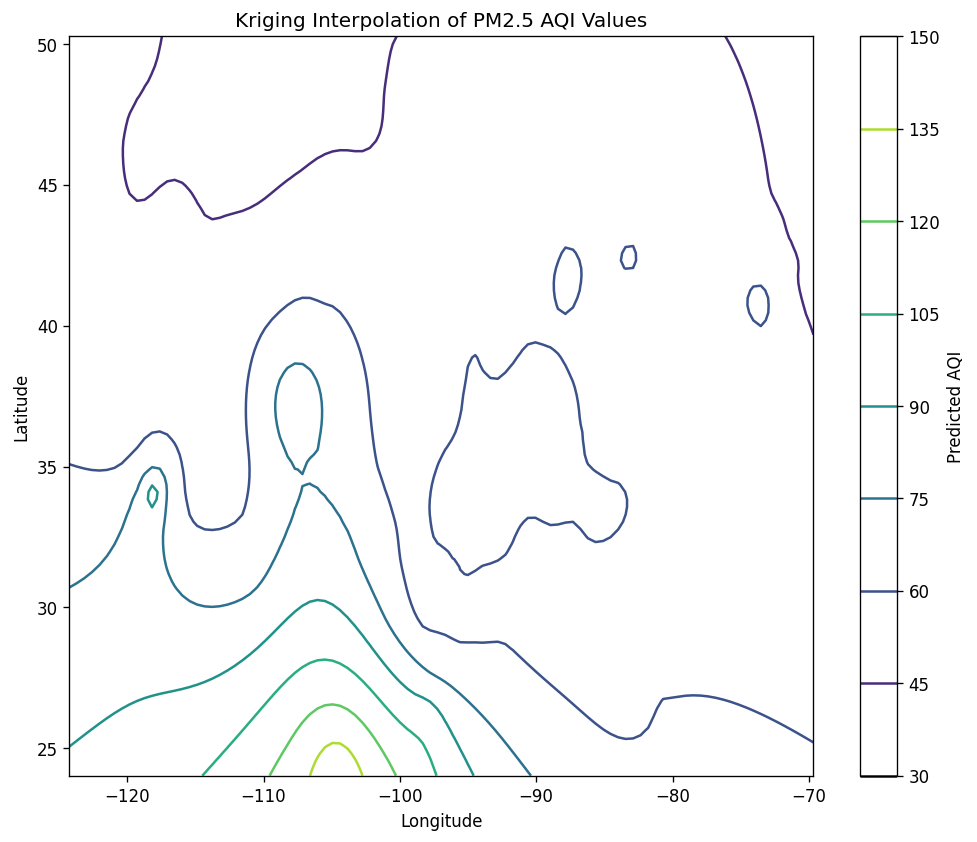

In [55]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ contour cho giá trị dự đoán
plt.figure(figsize=(10, 8))
contour = plt.contour(grid_lon, grid_lat, z, cmap='viridis')
plt.colorbar(contour, label='Predicted AQI')

# Đặt tên trục và tiêu đề
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kriging Interpolation of PM2.5 AQI Values')

# Hiển thị biểu đồ
plt.show()
